# Analysis for BR Modelling

In [1]:
import os
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data import
current_dir = os.getcwd()

# construct path to the project data folder
data_dir = os.path.join(current_dir, '..', '..', 'Data','Sonar_Issues')

# load SonarQube measure data
df = pd.read_csv(os.path.join(data_dir, 'measures+tags.csv'), low_memory=False)
df = df[df['PROJECT_ID'] == 'hive']
df

,PROJECT_ID,SQ_ANALYSIS_DATE,CLASSES,FILES,LINES,NCLOC,PACKAGE,STATEMENTS,FUNCTIONS,COMMENT_LINES,...,FUNCTION_COMPLEXITY,COGNITIVE_COMPLEXITY,LINES_TO_COVER,UNCOVERED_LINES,DUPLICATED_LINES,DUPLICATED_BLOCKS,DUPLICATED_FILES,COMMENT_LINES_DENSITY,DUPLICATED_LINES_DENSITY,TAGS
13698,hive,2015-03-03 00:37:22,8477.0,3882.0,1088490.0,743742.0,387,358319.0,62459.0,76113.0,...,2.3,121074.0,437602.0,437602.0,140806,7917,813,9.3,12.9,"brain-overload, unused, antipattern, pitfall"
13699,hive,2015-03-02 18:18:35,8477.0,3882.0,1088466.0,743721.0,387,358306.0,62458.0,76112.0,...,2.3,121067.0,437585.0,437585.0,140806,7917,813,9.3,12.9,"error-handling, design, unused, suspicious"
13700,hive,2015-02-27 23:08:33,8468.0,3872.0,1087272.0,742901.0,387,357917.0,62390.0,76071.0,...,2.3,120954.0,437096.0,437096.0,140709,7913,810,9.3,12.9,"convention, pitfall"
13701,hive,2015-02-27 21:30:05,8327.0,3789.0,1071783.0,731599.0,364,352969.0,61412.0,75080.0,...,2.3,119218.0,431125.0,431125.0,139347,7774,791,9.3,13.0,pitfall
13702,hive,2015-02-27 21:09:45,8327.0,3789.0,1071783.0,731599.0,364,352969.0,61412.0,75080.0,...,2.3,119218.0,431125.0,431125.0,139347,7774,791,9.3,13.0,"error-handling, clumsy, design, suspicious, pi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15549,hive,2008-09-18 17:37:59,664.0,399.0,72263.0,51707.0,33,28559.0,4592.0,3235.0,...,2.6,11206.0,33041.0,33041.0,17659,1224,75,5.9,24.4,"error-handling, clumsy, brain-overload, bad-pr..."
15550,hive,2008-09-18 00:09:17,661.0,397.0,71629.0,51241.0,33,28335.0,4538.0,3215.0,...,2.6,11061.0,32889.0,32889.0,17789,1228,74,5.9,24.8,"error-handling, clumsy, brain-overload, design..."
15551,hive,2008-09-17 20:13:00,613.0,358.0,67865.0,48976.0,29,27145.0,4346.0,2985.0,...,2.6,10701.0,31505.0,31505.0,16785,1208,66,5.7,24.7,"convention, design"
15552,hive,2008-09-17 00:28:22,613.0,358.0,67754.0,48873.0,29,27078.0,4340.0,2983.0,...,2.6,10691.0,31428.0,31428.0,16790,1208,66,5.8,24.8,"brain-overload, clumsy"


In [3]:
all_tags = ['convention', 'brain-overload','unused','error-handling','bad-practice','pitfall',
            'clumsy','suspicious','design','antipattern','redundant','confusing','performance','obsolete']

# transform TAGS strings to lists
df.loc[:, 'TAGS'] = df['TAGS'].str.split(',')
# remove whitespaces
df.loc[:, 'TAGS'] = df['TAGS'].apply(lambda x: [item.strip() for item in x])

# save TAGS as raw_labels to be further processed
raw_labels = df['TAGS']

# initialise mlb with all tag categories
mlb = MultiLabelBinarizer(classes=all_tags)
# fit the mlb with the list of lists of raw labels
Y_binarized = mlb.fit_transform(raw_labels)

print(f"MLB classes (order of one-hot columns): {mlb.classes_}")
num_classes = len(mlb.classes_)
print(f"Total number of possible labels: {num_classes}")

tags_df = pd.DataFrame(Y_binarized, columns=mlb.classes_)
tags_df

MLB classes (order of one-hot columns): ['convention' 'brain-overload' 'unused' 'error-handling' 'bad-practice'
 'pitfall' 'clumsy' 'suspicious' 'design' 'antipattern' 'redundant'
 'confusing' 'performance' 'obsolete']
Total number of possible labels: 14


,convention,brain-overload,unused,error-handling,bad-practice,pitfall,clumsy,suspicious,design,antipattern,redundant,confusing,performance,obsolete
0,0,1,1,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1,1,0,0,0,1,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,1,1,0,1,1,1,1,1,0,1,0,0,0,0
1852,1,1,1,1,1,1,1,1,1,1,0,0,1,1
1853,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1854,0,1,0,0,0,0,1,0,0,0,0,0,0,0


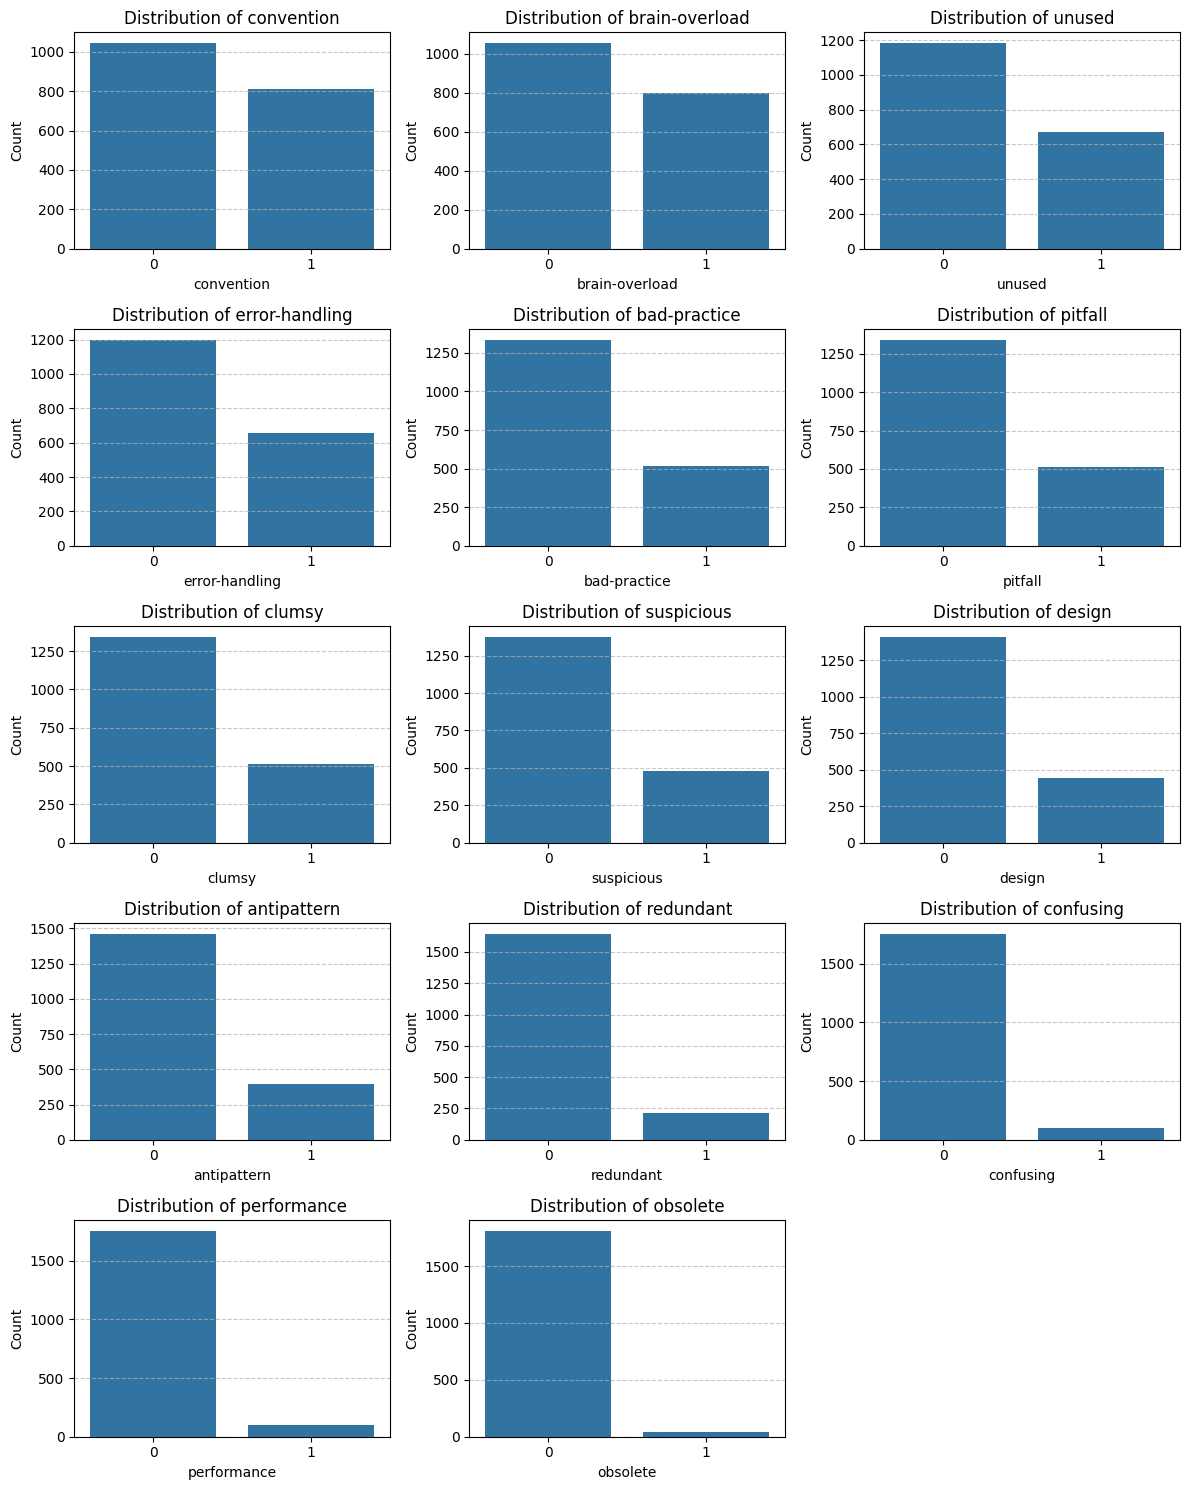

In [14]:
num_tags = 14
ncols = 3
nrows = math.ceil(num_tags / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))

axes = axes.flatten()

for i, col in enumerate(tags_df.columns):
    ax = axes[i]

    sns.countplot(x=tags_df[col], ax=ax)

    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f"Distribution of {col}")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks([0, 1])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('binary_distribution_plot.png', dpi=300, bbox_inches='tight')
plt.show()